###  Import Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Load Dataset

In [11]:
data = {
    "years_experience": [1, 3, 5, 7, 10, 12, 15, 20],
    "education_level": ["High School", "Bachelor", "Bachelor", "Master", "Master", "PhD", "PhD", "PhD"],
    "company_size": ["Small", "Small", "Medium", "Medium", "Large", "Large", "Large", "Large"],
    "skill_python": [1,1,1,1,1,0,1,1],
    "skill_sql":    [0,1,1,1,1,1,1,1],
    "skill_ml":     [0,0,1,1,1,1,1,1],
    "salary":       [40000, 55000, 65000, 80000, 95000, 120000, 135000, 150000]
}
df = pd.DataFrame(data)

###  Preprocess

In [12]:
X = df.drop("salary", axis=1)
y = df["salary"]

# Handle missing numeric values
imputer = SimpleImputer(strategy="median")
X["years_experience"] = imputer.fit_transform(X[["years_experience"]])

# Label Encoding categorical features
le_edu = LabelEncoder()
le_size = LabelEncoder()
X["education_level"] = le_edu.fit_transform(X["education_level"])
X["company_size"] = le_size.fit_transform(X["company_size"])

# Final feature matrix
X_final = X.values

### Train-Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)


### Apply Multiple Regression Models

#### (A) Linear Regression

In [14]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train) 
y_pred_lr = lr_model.predict(X_test)

#### (B) Polynomial Regression

In [15]:
poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train) 
X_poly_test = poly.transform(X_test) 
 
poly_model = LinearRegression() 
poly_model.fit(X_poly_train, y_train) 
y_pred_poly = poly_model.predict(X_poly_test)

#### (C) Ridge & Lasso Regression

In [16]:
ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train) 
y_pred_ridge = ridge_model.predict(X_test) 
 
lasso_model = Lasso(alpha=1.0) 
lasso_model.fit(X_train, y_train) 
y_pred_lasso = lasso_model.predict(X_test)

#### (D) Decision Tree Regression

In [17]:
dt_model = DecisionTreeRegressor() 
dt_model.fit(X_train, y_train) 
y_pred_dt = dt_model.predict(X_test)

#### (E) Random Forest Regression

In [18]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
rf_model.fit(X_train, y_train) 
y_pred_rf = rf_model.predict(X_test)

###  Model Evaluation

In [22]:
# Store results in a dictionary
results = {
    "Linear Regression": y_pred_lr,
    "Polynomial Regression": y_pred_poly,
    "Ridge": y_pred_ridge,
    "Lasso": y_pred_lasso,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf
}

scores = {}
for name, preds in results.items():
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    scores[name] = r2
    print(f"\n{name}:")
    print(f"R²  = {r2:.4f}")
    print(f"MSE = {mse:.2f}")
    print(f"MAE = {mae:.2f}")

# Best model
best_model = max(scores, key=scores.get)
print("\nBest Model based on R²:", best_model)



Linear Regression:
R²  = 0.9572
MSE = 45218116.46
MAE = 6723.98

Polynomial Regression:
R²  = 0.9971
MSE = 3062819.88
MAE = 1463.63

Ridge:
R²  = 0.9554
MSE = 47157231.27
MAE = 6599.57

Lasso:
R²  = 0.9711
MSE = 30513116.36
MAE = 5319.21

Decision Tree:
R²  = 0.5976
MSE = 425000000.00
MAE = 20000.00

Random Forest:
R²  = 0.9982
MSE = 1922500.00
MAE = 1250.00

Best Model based on R²: Random Forest


### Visualization

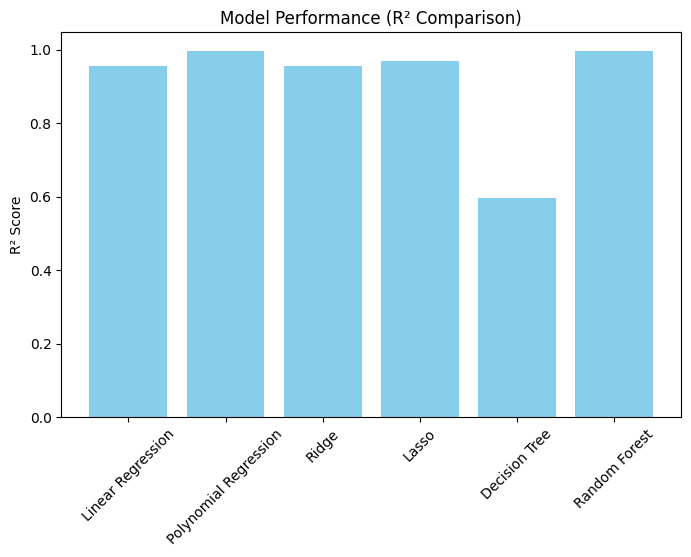

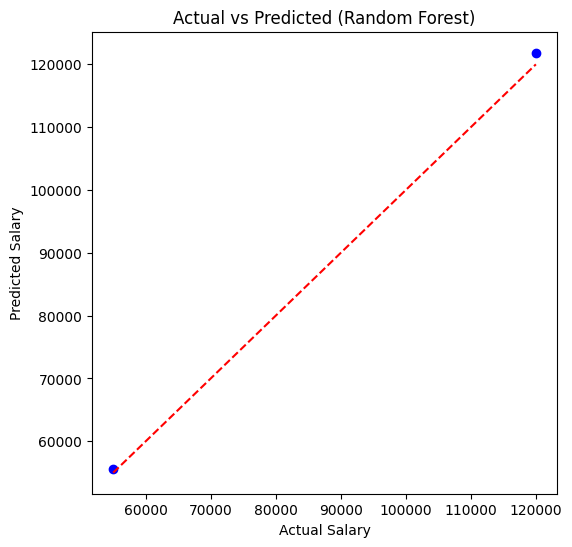

In [23]:
# 1. Bar chart of R² scores
plt.figure(figsize=(8,5))
plt.bar(scores.keys(), scores.values(), color="skyblue")
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("Model Performance (R² Comparison)")
plt.show()

# 2. Actual vs Predicted for Best Model
best_preds = results[best_model]

plt.figure(figsize=(6,6))
plt.scatter(y_test, best_preds, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title(f"Actual vs Predicted ({best_model})")
plt.show()